In [6]:
import numpy as np
import pandas as pd

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 

In [9]:
mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
len(y_train)

60000

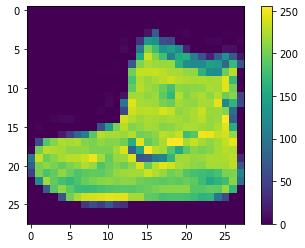

In [20]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar() #sağdaki grafik
plt.show()

In [22]:
x_test = x_test / 255.0

y_test = y_test / 255.0  
#x ve y'leri belli bir piksele oturtuyoruz resimlerin hepsi aynı olması için


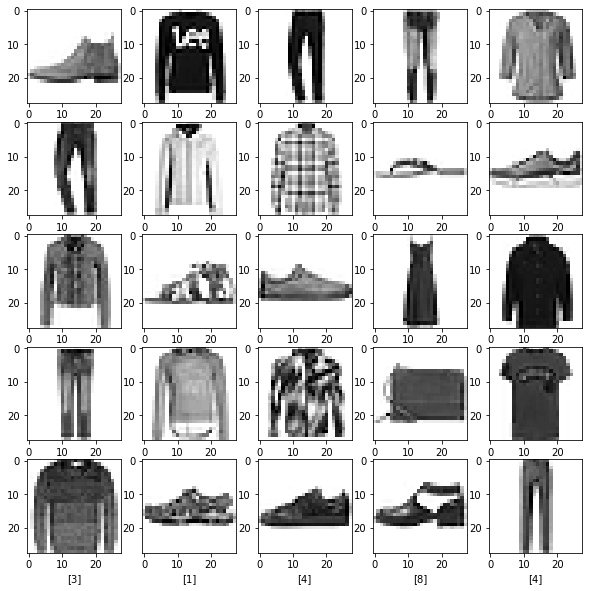

In [36]:
plt.figure(figsize=(10,10)) #10x10'luk figur hazırladık
for i in range(25): #25 resim için döncek
    plt.subplot(5,5,i+1)  
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show() 

In [37]:
model = tf.keras.Sequential()
#Tanımlamalar yaparak modelimize katmanlar ekliyoruz hangi activasyon fonksiyonunda çalışcak vb.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Modele bakış yapalım
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [64]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 773us/step - loss: 0.5376 - accuracy: 0.8208
Epoch 2/5
1875/1875 [==============================] - 1s 779us/step - loss: 0.5304 - accuracy: 0.8225
Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.5154 - accuracy: 0.82 - 2s 830us/step - loss: 0.5146 - accuracy: 0.8285
Epoch 4/5
1875/1875 [==============================] - 2s 841us/step - loss: 0.5129 - accuracy: 0.8304
Epoch 5/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.5046 - accuracy: 0.8329


In [73]:
#Son accuracy de görüldüğü gibi %83 başarı var. modelde